In [1]:
import json
#from fastdtw import fastdtw
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.spatial import distance
import itertools
import sklearn
from matplotlib import rc

rc('text', usetex=True)

sns.set(font='serif', style='white')

In [11]:
with open('tmp/nsyot_fullnaiveseen.json') as f:#('tmp/fogdm_7000_testingnaiveseen.json') as f:
    statetracelearned = json.load(f)

In [15]:
sensornames = ['S'+str(idx) for idx in range(16)]
def create_trace(data):
    t = {}
    for s in sensornames:
        t[s] = np.asarray([i[s] for i in data])#[select[0]:select[1]]])
    return t

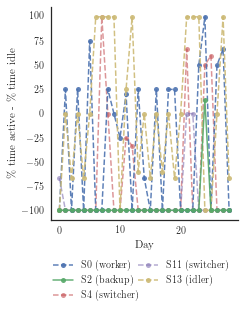

In [13]:
#next plot moving average of nodes %active - % idle
fig,ax = plt.subplots(1)
fig.set_size_inches(3.5,4.5)
arun = create_trace(statetracelearned['data'][4][240::])
saver_group = [2]
always_on = [0]
interesting = [4,11]
idler = [13]
def idle_per_slice(sliced):
    idle = [state[0] == 1 for state in sliced if state[1]>0]
    return 100*sum(idle)/len(idle)
def active_per_slice(sliced):
    active = [state[0] == 0 for state in sliced if state[1]>0]
    return 100*sum(active)/len(active)
for s in range(16):
    feature = [active_per_slice(arun['S'+str(s)][idx:idx+8,:])-idle_per_slice(arun['S'+str(s)][idx:idx+8,:])
               for idx in [i*8 for i in range(29)]]
    if s in interesting:
        ax.plot(feature, alpha=0.6, linestyle='--', marker='o',label='S'+str(s)+' (switcher)', markersize=5, linewidth=1.5)
    if s in saver_group:
        ax.plot(feature, alpha=0.9,linestyle='-',marker='o', label='S'+str(s)+' (backup)', markersize=5,zorder=1000, linewidth=1.5)
    if s in idler:
        ax.plot(feature, alpha=0.9, linestyle='--', marker='o',label='S'+str(s) +' (idler)', markersize=5,zorder=100, linewidth=1.5)
    if s in always_on:
        ax.plot(feature, alpha=0.9, linestyle='--', marker='o',label='S'+str(s) +' (worker)', markersize=5,zorder=100, linewidth=1.5)
    
    #else:
    #    ax.plot(feature, alpha=0.1)
    sns.despine()
ax.legend(bbox_to_anchor=(1,-0.15),ncol=2, columnspacing=0)
ax.set_xlabel('Day')
ax.set_ylabel('\% time active - \% time idle')
fig.tight_layout()
#fig.savefig('individualtemporal.png', dpi=600)


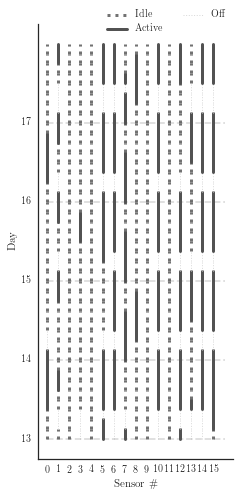

In [23]:
fig, ax = plt.subplots(1)
fig.set_size_inches(3.5,8)
with open('tmp/rqezz_lpseenperfect.json') as f:#('tmp/fogdm_7000_testingnaiveseen.json') as f:
    statetrace = json.load(f)
run =4
startday=43
periods=8
duration=5
select = [startday*periods,(startday+duration)*periods]
fulldata = statetracelearned['data'][run]
data = statetracelearned['data'][run]#[0:select[1]+16]
#print([i['S15'][0] for i in data[select[0]:select[1]]])
xs = list(range(len(fulldata)))#[0:select[1]+16]
flag0,flag1,flag2,flag3 = True, True,True,True
for i in range(16):
    #sensor = data['S'+str(idx)]
    ys = [i]*len(xs)
    for idxf, state in enumerate(data[select[0]:select[1]]):
        idx= select[0]+idxf                        
        sensorstate = state['S'+str(i)]
        #print(sensorstate)
        status = sensorstate[0]
        battery = sensorstate[1]
        bit = 1 if battery>0 else 0
        if status == 0 and battery>0:
            label ='Active' if flag0 else ''
            ax.plot([ys[idx], ys[idx+1]], [xs[idx],xs[idx+1]], color='#525252', linewidth=3,label=label)#battery/2)
            flag0 =False
        if status == 1 and battery>0:
            label ='Idle' if flag1 else ''
            ax.plot([ys[idx], ys[idx+1]], [xs[idx],xs[idx+1]], color='#727272', linewidth=3*bit, linestyle=':',label=label)#battery/2)
            flag1 = False
        if status == 2 and battery>0:
            label = 'Deep sleep' if flag2 else ''
            ax.plot([ys[idx], ys[idx+1]], [xs[idx],xs[idx+1]], color='#cb181d', linewidth=3*bit, linestyle=':',label=label)#battery/2)
            flag2 = False
        if battery == 0:
            label ='Off' if flag3 else ''
            ax.plot([ys[idx], ys[idx+1]], [xs[idx],xs[idx+1]], color='#d9d9d9', linewidth=1,linestyle=':',label=label)#battery/2)
            flag3=False
sns.despine()
yticks = [i for i in range(select[0], select[1]) if i%8==0]
for y in yticks:
    ax.plot([0,16],[y,y], linestyle='--', color='#525252', alpha=0.2)
ylabels = [int((i/8)%30) for i in yticks]
_ =ax.set_yticks(yticks)
ax.set_yticklabels(ylabels)
ax.set_ylabel('Day')
xticks = [int(i) for i in range(16)]
_ =ax.set_xticks(xticks)
_ = ax.set_xlabel('Sensor \#')
_=ax.legend(bbox_to_anchor=(1,1.05),ncol=2)
#ax.axvline(x=0)
fig.savefig('temporaldetaileno.png',dpi=600)
#fig.tight_layout()
#ax.set_ylim()
#['S12','S10','S9','S15','S11','S14','S7','S13']